# IST 707 Checkpoint 2: The A+ Team

## Predicting Playoff Potential: Key Factors Behind NBA Playoff Teams

We will start by uploading our data which contains per game variables, opponent per game variables, and advanced statistics.

In [1]:
import pandas as pd

#Importing our data
nba = pd.read_csv("/workspaces/student-group-project-the-a-team/checkpoint2/IST707_NBA_Data.csv")
nba.head()

,Rk_x,Team,G,MP,FG,FGA,FG%,3P,3PA,3P%,...,ORB%,FT/FGA,eFG%.1,TOV%.1,DRB%,FT/FGA.1,Arena,Attend.,Attend./G,Playoff
0,1,San Antonio Spurs,82,240.9,47.0,94.4,0.498,0.6,2.5,0.252,...,31.8,0.262,0.506,14.4,66.8,0.216,HemisFair Arena,NaN,998.0,1
1,2,Los Angeles Lakers,82,242.4,47.5,89.9,0.529,0.2,1.2,0.200,...,32.6,0.220,0.475,14.0,66.9,0.181,The Forum,582882.0,427.0,1
2,3,Cleveland Cavaliers,82,243.0,46.5,98.1,0.474,0.4,2.3,0.193,...,33.1,0.212,0.505,16.3,65.9,0.216,Coliseum at Richfield,NaN,1189.0,0
3,4,New York Knicks,82,241.2,46.4,93.6,0.496,0.5,2.3,0.220,...,33.7,0.221,0.498,16.4,64.0,0.263,Madison Square Garden (IV),NaN,1432.0,0
4,5,Boston Celtics,82,242.4,44.1,90.1,0.490,2.0,5.1,0.384,...,34.8,0.258,0.475,16.5,67.8,0.234,Boston Garden,596349.0,14490.0,1


In [5]:
nba.shape

(1254, 78)

As we can see from the shape of our data frame, we have 1254 rows and 78 columns.

In [6]:
nba.dtypes

Rk_x           int64
Team          object
G              int64
MP           float64
FG           float64
              ...   
FT/FGA.1     float64
Arena         object
Attend.      float64
Attend./G    float64
Playoff        int64
Length: 78, dtype: object

We are going to use the janitor package to clean our column names.

In [2]:
!pip install pyjanitor

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 16.6 MB/s eta 0:00:00

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python3 -m pip install --upgrade pip


In [3]:
import janitor

#Cleaning data frame
nba = pd.DataFrame(nba) 
nba = nba.clean_names()

print(nba.columns)

Index(['rk_x', 'team', 'g', 'mp', 'fg', 'fga', 'fg%', '3p', '3pa', '3p%', '2p',
       '2pa', '2p%', 'ft', 'fta', 'ft%', 'orb', 'drb', 'trb', 'ast', 'stl',
       'blk', 'tov', 'pf', 'pts', 'year', 'opponent_rk', 'opponent_g',
       'opponent_mp', 'opponent_fg', 'opponent_fga', 'opponent_fg%',
       'opponent_3p', 'opponent_3pa', 'opponent_3p%', 'opponent_2p',
       'opponent_2pa', 'opponent_2p%', 'opponent_ft', 'opponent_fta',
       'opponent_ft%', 'opponent_orb', 'opponent_drb', 'opponent_trb',
       'opponent_ast', 'opponent_stl', 'opponent_blk', 'opponent_tov',
       'opponent_pf', 'opponent_pts', 'rk_y', 'age', 'w', 'l', 'pw', 'pl',
       'mov', 'sos', 'srs', 'ortg', 'drtg', 'nrtg', 'pace', 'ftr', '3par',
       'ts%', 'efg%', 'tov%', 'orb%', 'ft_fga', 'efg%_1', 'tov%_1', 'drb%',
       'ft_fga_1', 'arena', 'attend_', 'attend_g', 'playoff'],
      dtype='object')


After cleaning our data frame column names, we can see our new data frame column names.

## Exploratory Analysis

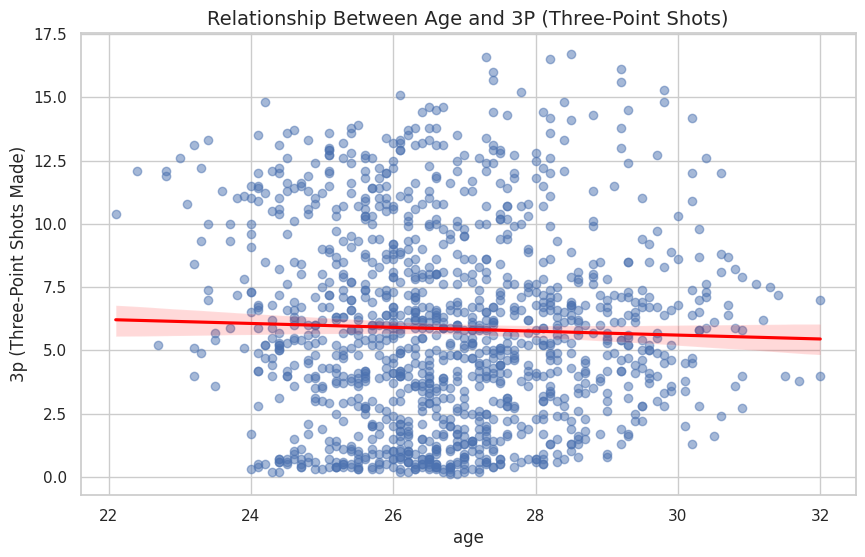

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plot
sns.set(style="whitegrid")

# Create a scatter plot with a regression line
plt.figure(figsize=(10, 6))
sns.regplot(data=nba, x="age", y="3p", scatter_kws={"alpha": 0.5}, line_kws={"color": "red"})

# Add title and labels
plt.title("Relationship Between Age and 3P (Three-Point Shots)", fontsize=14)
plt.xlabel("age", fontsize=12)
plt.ylabel("3p (Three-Point Shots Made)", fontsize=12)

# Show the plot
plt.show()


No Strong Trend:
The regression line indicates a slight trend, but the spread of data points suggests a weak correlation between age and 
the number of three-point shots made. This implies that age alone may not strongly predict three-point performance.

In [8]:
# Ensure 'Age' and 'AST' are numeric
nba['age'] = pd.to_numeric(nba['age'], errors='coerce')
nba['ast'] = pd.to_numeric(nba['ast'], errors='coerce')

# Calculate the correlation between Age and AST
age_assist_correlation = nba[['age', 'ast']].corr().iloc[0, 1]

# Print the correlation result
print(f"Correlation between Age and Assists (AST): {age_assist_correlation:.4f}")


Correlation between Age and Assists (AST): 0.0755


The correlation between Age and Assists (AST) is approximately 0.0755, indicating a very weak positive relationship. 
Age has minimal influence on the number of assists a player makes. 

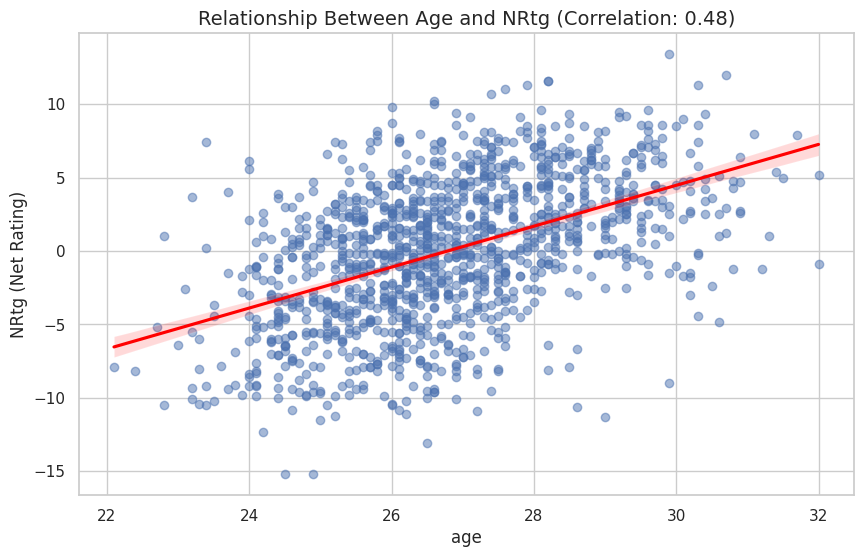

In [9]:

# Ensure 'NRtg' and 'Age' columns are numeric
nba['nrtg'] = pd.to_numeric(nba['nrtg'], errors='coerce')

# Drop rows with missing values in 'Age' and 'NRtg'
nba = nba.dropna(subset=['age', 'nrtg'])

# Calculate the correlation
nrtg_age_correlation = nba[['age', 'nrtg']].corr().iloc[0, 1]

# Visualize the relationship
plt.figure(figsize=(10, 6))
sns.regplot(data=nba, x='age', y='nrtg', scatter_kws={"alpha": 0.5}, line_kws={"color": "red"})
plt.title(f"Relationship Between Age and NRtg (Correlation: {nrtg_age_correlation:.2f})", fontsize=14)
plt.xlabel("age", fontsize=12)
plt.ylabel("NRtg (Net Rating)", fontsize=12)
plt.show()


NRtg can reflect their impact on both offensive and defensive play when they are on the court. 
Older players having a higher NRtg might suggest they bring experience, efficiency, or strategic advantages 
that contribute positively to their team's overall performance.

NRtg, or Net Rating, is a basketball statistic that measures a player's or team's point differential per 100 possessions. 
It is calculated as:

Net Rating = Offensive Rating − Defensive Rating
Offensive Rating: Points scored per 100 possessions.
Defensive Rating: Points allowed per 100 possessions.

Here we tried to calculate and visualiaze average Point Differential Per Team.


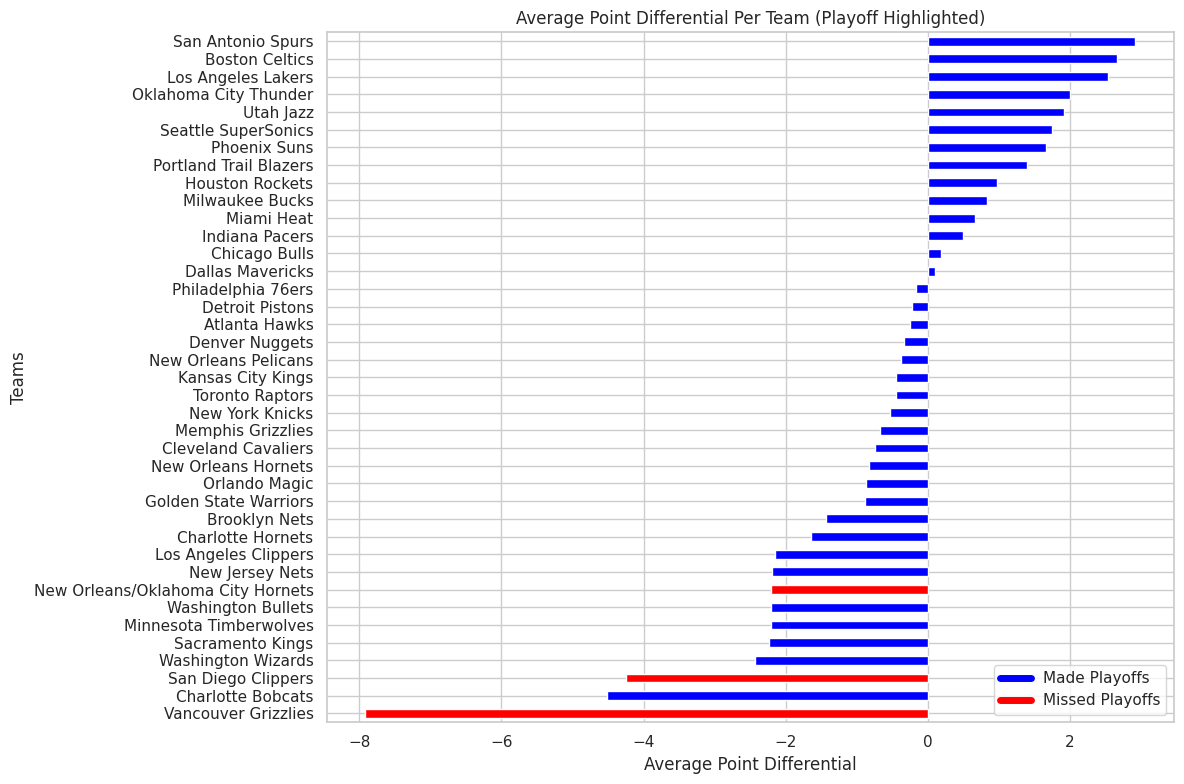

In [5]:


# Point differential
nba['Point Differential'] = nba['pts'] - nba['opponent_pts']

# average point differential per team
avg_point_differential = nba.groupby('team')['Point Differential'].mean()

# Get playoff information for each team
playoff_teams = nba.groupby('team')['playoff'].max()

# Combine point differential and playoff information
point_differential_with_playoff = pd.DataFrame({
    'Average Point Differential': avg_point_differential,
    'Made Playoff': playoff_teams
}).sort_values('Average Point Differential')

# Plot the average point differential with playoff info
plt.figure(figsize=(12, 8))
colors = ['blue' if playoff else 'red' for playoff in point_differential_with_playoff['Made Playoff']]
point_differential_with_playoff['Average Point Differential'].plot(
    kind='barh',
    color=colors,
    title="Average Point Differential Per Team (Playoff Highlighted)"
)
plt.xlabel("Average Point Differential")
plt.ylabel("Teams")
plt.legend(handles=[
    plt.Line2D([0], [0], color='blue', label='Made Playoffs', linewidth=5),
    plt.Line2D([0], [0], color='red', label='Missed Playoffs', linewidth=5)
], loc='lower right')
plt.tight_layout()
plt.show()



Positive values (plus): These indicate that the team, on average, scored more points than their opponents during games. 
A higher positive value suggests the team consistently outperformed their opponents, often associated with stronger overall performance and success.

The total number of tickets sold for all games hosted by each team during the period covered in the dataset.

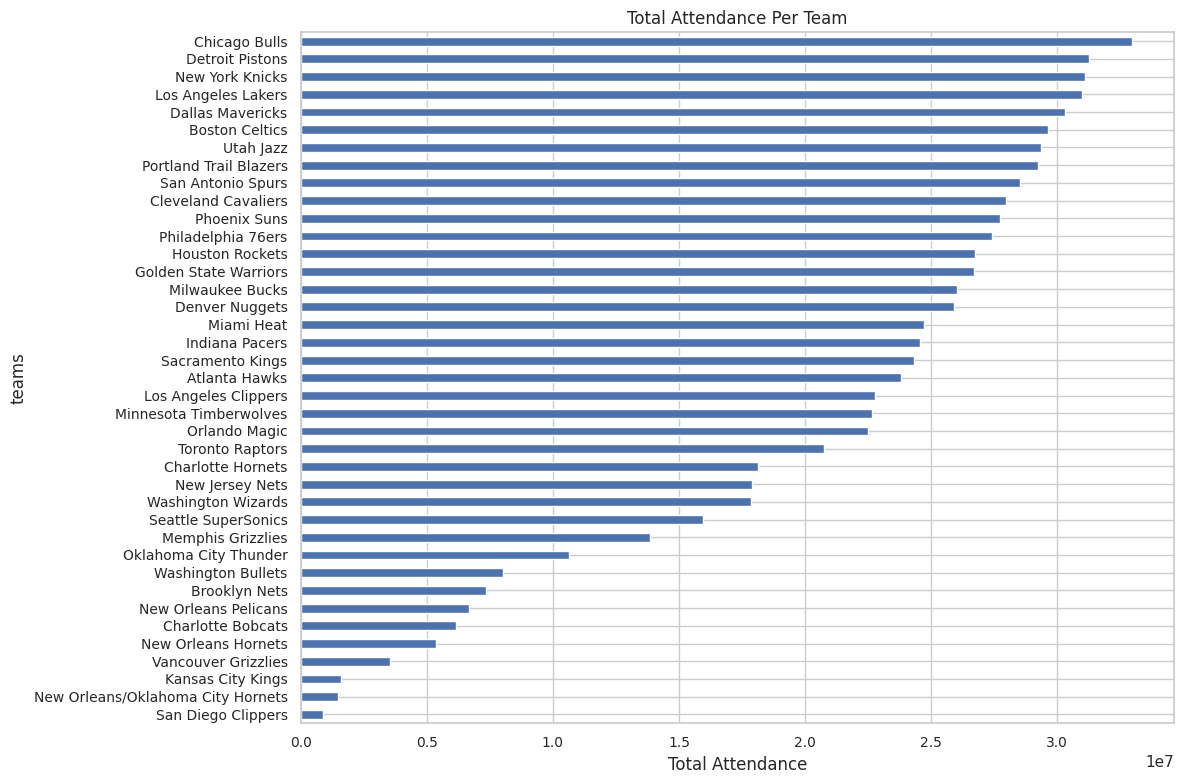

In [7]:
# Group by team and calculate the total attendance
attendance_per_team = nba.groupby('team')['attend_'].sum().sort_values(ascending=True)

# Plot the attendance per team
plt.figure(figsize=(12, 8))
attendance_per_team.plot(kind='barh', title="Total Attendance Per Team", fontsize=10)
plt.xlabel("Total Attendance")
plt.ylabel("teams")
plt.tight_layout()
plt.show()


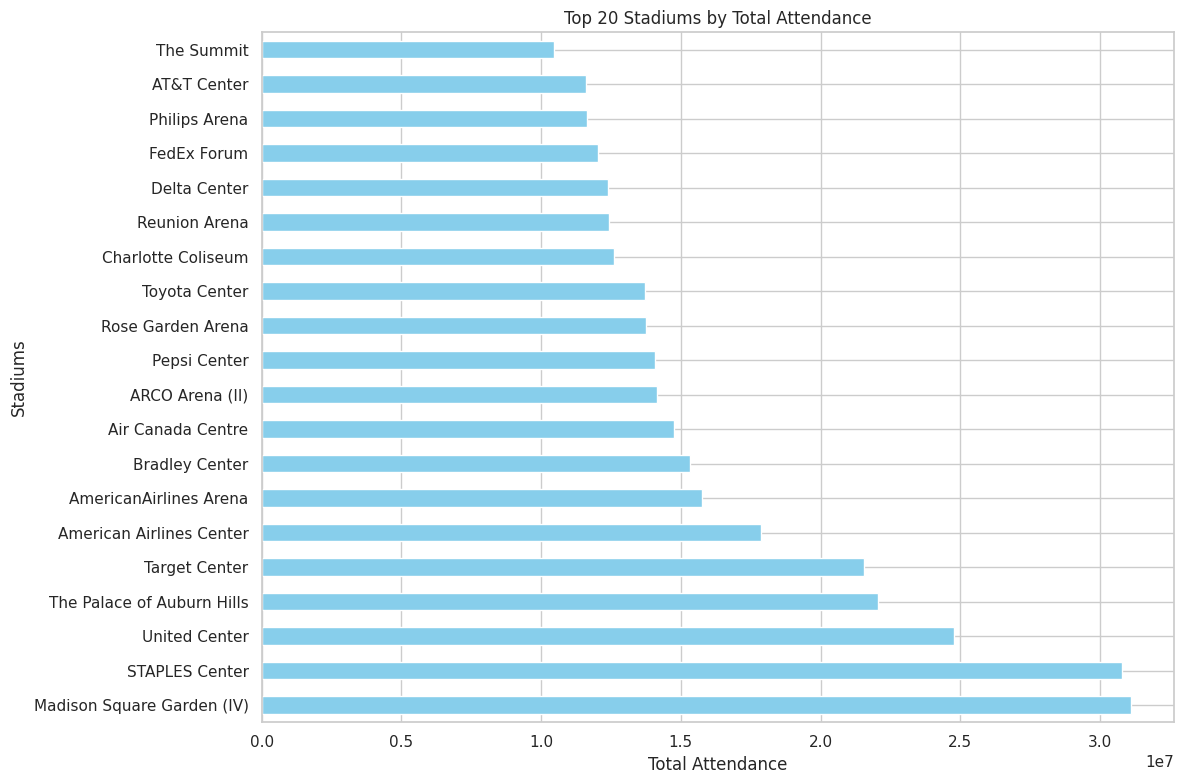

In [8]:

# Group by stadium (Arena) and calculate total attendance
attendance_per_stadium = nba.groupby('arena')['attend_'].sum().sort_values(ascending=False)

# Filter top 20 stadiums
top_20_stadiums = attendance_per_stadium.head(20)

# Plot the total attendance for the top 20 stadiums
plt.figure(figsize=(12, 8))
top_20_stadiums.plot(kind='barh', title="Top 20 Stadiums by Total Attendance", color='skyblue')
plt.xlabel("Total Attendance")
plt.ylabel("Stadiums")
plt.tight_layout()
plt.show()


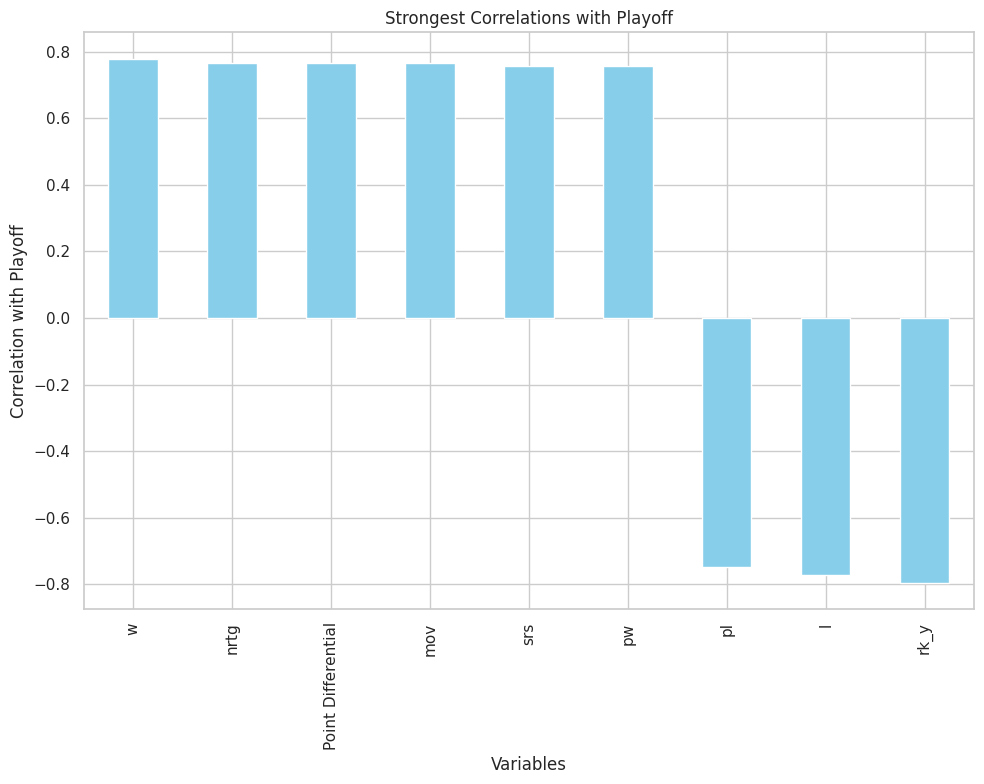

In [9]:

# Convert the 'Playoff' column to binary format
nba['playoff'] = nba['playoff'].apply(lambda x: 1 if x == 1 else 0)

# Filter numeric columns only
numeric_data = nba.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
correlation_matrix = numeric_data.corr()

# Extract correlations of 'Playoff' with all other variables
playoff_correlation = correlation_matrix['playoff'].sort_values(ascending=False)

# Filter the strongest correlations (absolute value >= 0.5)
threshold = 0.5
strong_correlation = playoff_correlation[playoff_correlation.abs() >= threshold].drop('playoff')

# Visualization of the strongest correlations
plt.figure(figsize=(10, 8))
strong_correlation.plot(kind='bar', color='skyblue', title="Strongest Correlations with Playoff")
plt.xlabel("Variables")
plt.ylabel("Correlation with Playoff")
plt.tight_layout()
plt.show()



The filtered columns (variables) with a strong correlation (absolute value ≥ 0.5) with "Playoff" from the dataset are:

W (Wins): Strong positive correlation with Playoff. Teams with more wins are highly likely to make the playoffs.
NRtg (Net Rating): Positive correlation. Higher net ratings (points scored vs. allowed per 100 possessions) increase playoff chances.
MOV (Margin of Victory): Positive correlation. Teams winning games by larger margins are more likely to qualify.
SRS (Simple Rating System): Positive correlation. A higher SRS, which includes strength of schedule and point differential, correlates strongly with playoff qualification.
PW (Pythagorean Wins): Positive correlation. This is a team's expected wins based on points scored and allowed.

The visualization shows the average ranking of each team over the last 10 years.
Teams with lower average rankings (closer to 1) performed better on the points table, 
suggesting a higher likelihood of making the playoffs consistently.

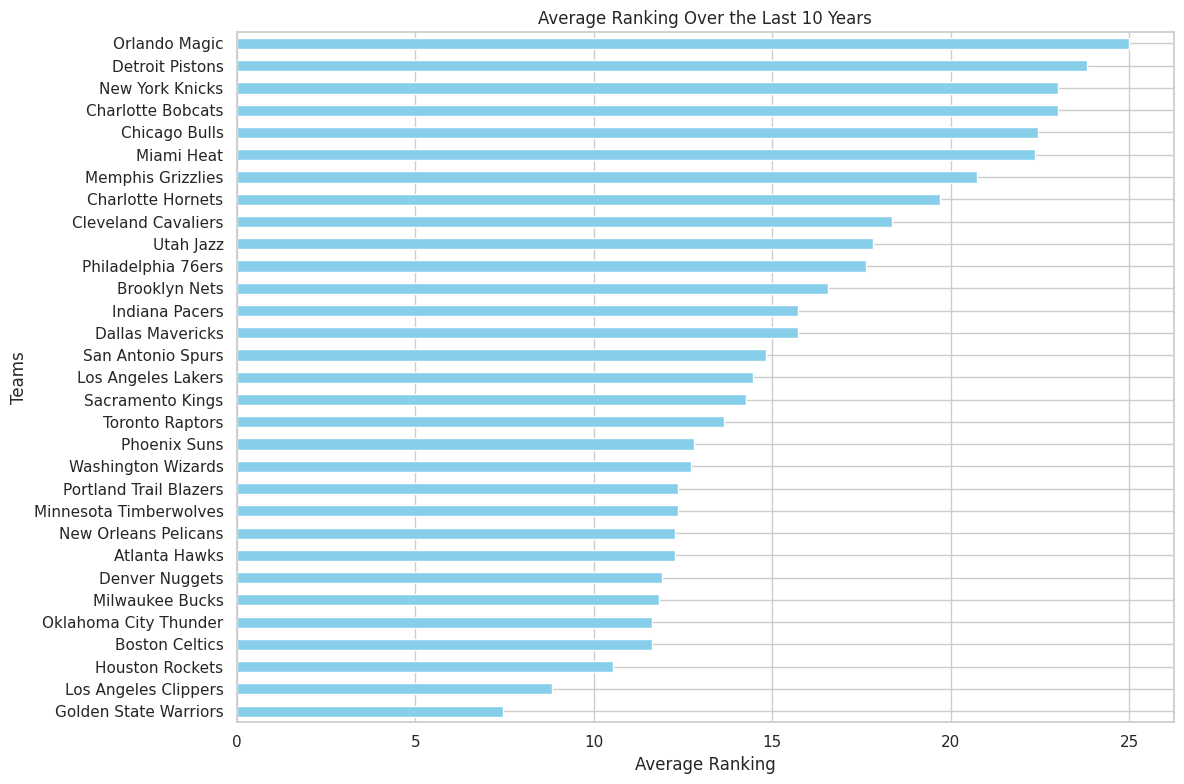

In [10]:
# Filter data to include only the last 10 years
nba['year'] = pd.to_numeric(nba['year'], errors='coerce')  # Ensure the Year column is numeric
last_10_years_data = nba[nba['year'] >= nba['year'].max() - 10]  # Filter for last 10 years

# Calculate the average ranking per team
average_ranking = last_10_years_data.groupby('team')['rk_x'].mean().sort_values()

# Plot the average ranking per team
plt.figure(figsize=(12, 8))
average_ranking.plot(kind='barh', title="Average Ranking Over the Last 10 Years", color='skyblue')
plt.xlabel("Average Ranking")
plt.ylabel("Teams")
plt.tight_layout()
plt.show()


### We will begin by exploring our per game variables and looking at the distributions of them.

In [11]:
nba.head()

,rk_x,team,g,mp,fg,fga,fg%,3p,3pa,3p%,...,orb%,ft_fga,efg%_1,tov%_1,drb%,ft_fga_1,arena,attend_,attend_g,playoff
0,1,San Antonio Spurs,82,240.9,47.0,94.4,0.498,0.6,2.5,0.252,...,31.8,0.262,0.506,14.4,66.8,0.216,HemisFair Arena,NaN,998.0,1
1,2,Los Angeles Lakers,82,242.4,47.5,89.9,0.529,0.2,1.2,0.200,...,32.6,0.220,0.475,14.0,66.9,0.181,The Forum,582882.0,427.0,1
2,3,Cleveland Cavaliers,82,243.0,46.5,98.1,0.474,0.4,2.3,0.193,...,33.1,0.212,0.505,16.3,65.9,0.216,Coliseum at Richfield,NaN,1189.0,0
3,4,New York Knicks,82,241.2,46.4,93.6,0.496,0.5,2.3,0.220,...,33.7,0.221,0.498,16.4,64.0,0.263,Madison Square Garden (IV),NaN,1432.0,0
4,5,Boston Celtics,82,242.4,44.1,90.1,0.490,2.0,5.1,0.384,...,34.8,0.258,0.475,16.5,67.8,0.234,Boston Garden,596349.0,14490.0,1


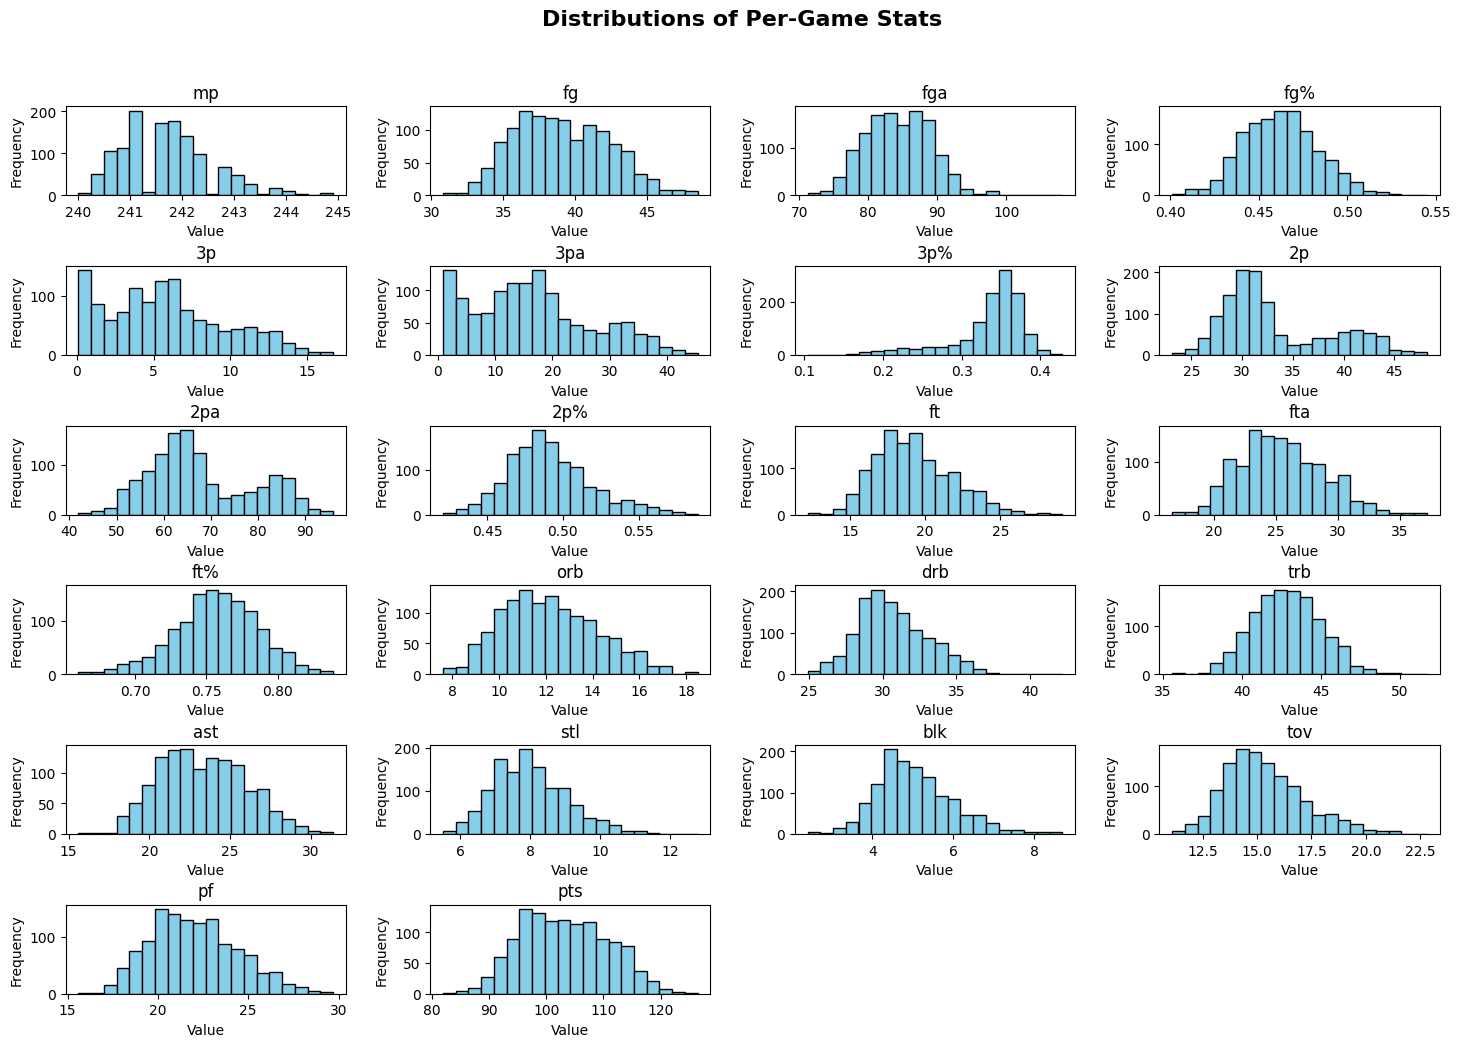

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

#Selecting per game stats
per_game_stats = nba.loc[:, 'mp':'pts']

#Setting columns and rows for the subplots
num_vars = per_game_stats.shape[1]
num_cols = 4 
num_rows = (num_vars // num_cols) + (num_vars % num_cols > 0)

#Creating subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))
fig.tight_layout(pad=3.0)

#Main Title
fig.suptitle("Distributions of Per-Game Stats", fontsize=16, fontweight='bold', y=1.05)

#Flattening
axes = axes.flatten()

#Plotting histograms
for i, column in enumerate(per_game_stats.columns):
    axes[i].hist(per_game_stats[column].dropna(), bins=20, color='skyblue', edgecolor='black')
    axes[i].set_title(column)
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')

#Removing empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.show()

We can see from our distributions that we have a lot of variables that take on symmetric distributions, or closely symmetric with long tails. 

The main variables that do not have symmetric or closely symmetric distributions are our field goal and 3-point field goals. This makes a lot of sense as we have seen a shift in how the game is played as recently, 3-pointers have become more frequently taken and 2-pointers have become obsolete, especially mid-range 2-pointers.

### We will now look at the distributions of our opponent per-game stats. These variables will be a good look at how each team is performing defensively.

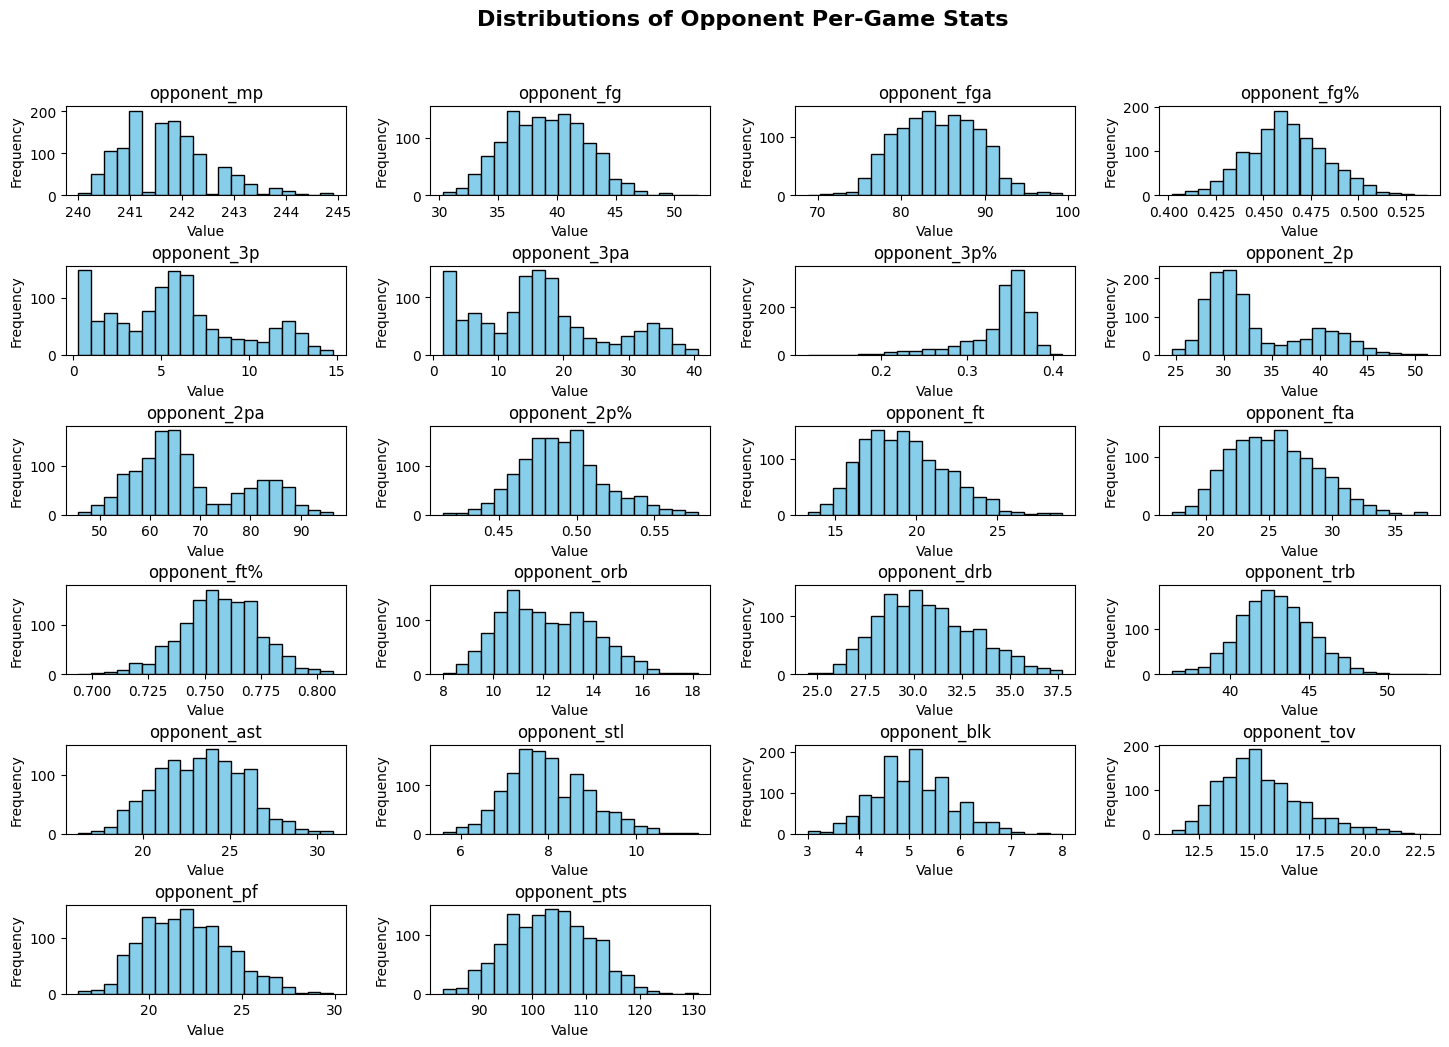

In [20]:
#Selecting per game stats
opponent_per_game_stats = nba.loc[:, 'opponent_mp':'opponent_pts']

#Setting columns and rows for the subplots
num_vars = opponent_per_game_stats.shape[1]
num_cols = 4 
num_rows = (num_vars // num_cols) + (num_vars % num_cols > 0)

#Creating subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))
fig.tight_layout(pad=3.0)

#Main Title
fig.suptitle("Distributions of Opponent Per-Game Stats", fontsize=16, fontweight='bold', y=1.05)

#Flattening
axes = axes.flatten()

#Plotting histograms
for i, column in enumerate(opponent_per_game_stats.columns):
    axes[i].hist(opponent_per_game_stats[column].dropna(), bins=20, color='skyblue', edgecolor='black')
    axes[i].set_title(column)
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')

#Removing empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.show()

We see the exact same results for our opponent per-game statistics. This makes sense as these statistics would just be the same as the per-game stats, except the opposite for each team (Each team's per-game stats would be shown in every other team's opponent per-game stats).

### Finally we will look at the distributions of our advanced statistics.

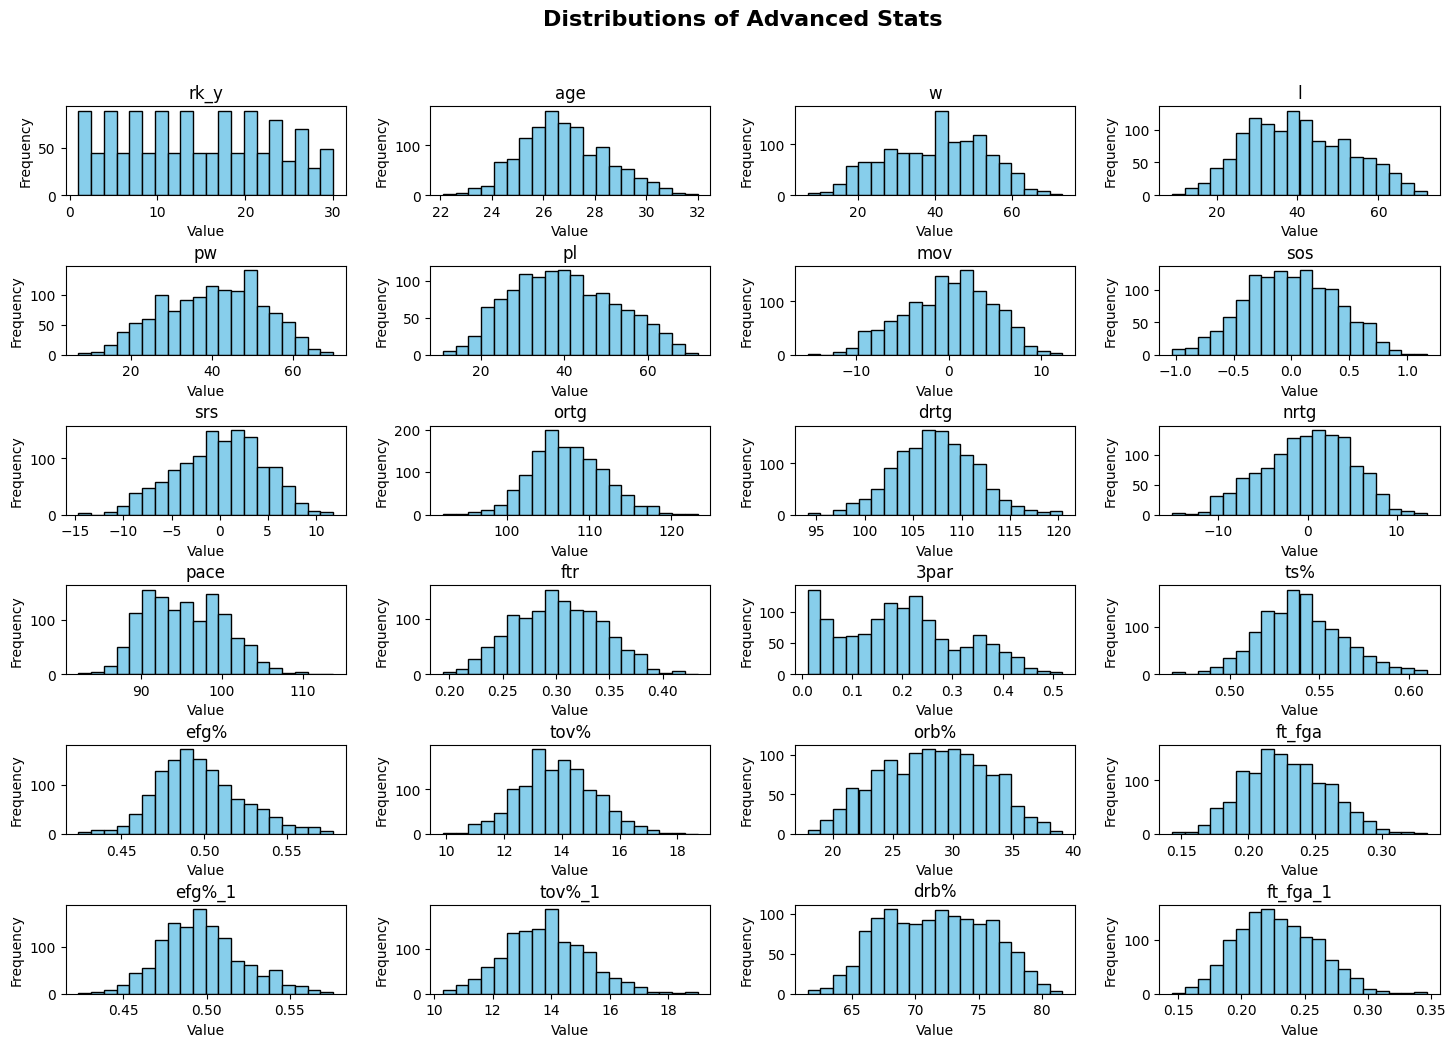

In [21]:
#Selecting per game stats
advanced_stats = nba.loc[:, 'rk_y':'ft_fga_1']

#Setting columns and rows for the subplots
num_vars = advanced_stats.shape[1]
num_cols = 4 
num_rows = (num_vars // num_cols) + (num_vars % num_cols > 0)

#Creating subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))
fig.tight_layout(pad=3.0)

#Main Title
fig.suptitle("Distributions of Advanced Stats", fontsize=16, fontweight='bold', y=1.05)

#Flattening
axes = axes.flatten()

#Plotting histograms
for i, column in enumerate(advanced_stats.columns):
    axes[i].hist(advanced_stats[column].dropna(), bins=20, color='skyblue', edgecolor='black')
    axes[i].set_title(column)
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')

#Removing empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.show()

Here we see many of our variables take on symmetric curves. This could show that a lot of our advanced statistics could be useful in determine playoff contenders as there will be a mix of teams centered in the average of these statistics and the good and bad teams will be outside of the centers (most-likely) showing which statistics will be bigger determinants of making the playoffs.

### Distirbution of Making the Playoffs (Our Dependendent Variable)

/tmp/ipykernel_5997/4030139072.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=playoff_counts.index, y=playoff_counts.values, palette='viridis')


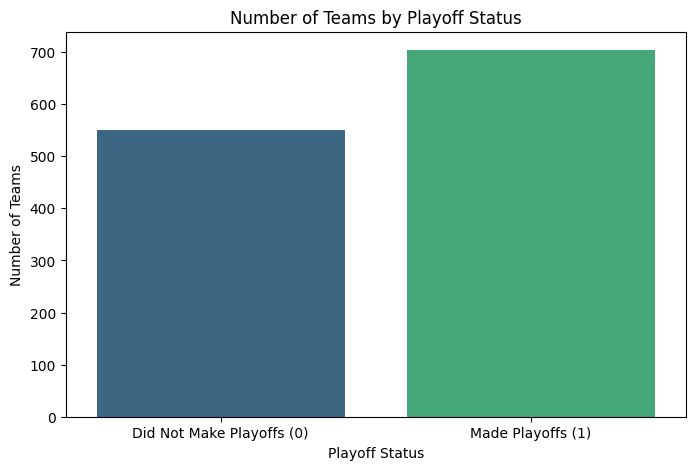

In [ ]:
#Counts of our playoff variable
playoff_counts = nba['playoff'].value_counts()

#Bar Plot
plt.figure(figsize=(8, 5))
sns.barplot(x=playoff_counts.index, y=playoff_counts.values, palette='viridis')
plt.xticks([0, 1], ['Did Not Make Playoffs (0)', 'Made Playoffs (1)'])
plt.xlabel('Playoff Status')
plt.ylabel('Number of Teams')
plt.title('Number of Teams by Playoff Status')
plt.show()

We see that we have more teams that made the playoffs then that did not make the playoffs, which makes sense since there are 30 NBA teams and 16 teams make the playoffs every year.

## Cleaning our Data Frame

In [24]:
#Columns to drop
columns_to_drop = ['rk_x', 'g', 'opponent_rk', 'opponent_g', 'rk_y', 'arena', 'attend_']

#Dropping columns
nba.drop(columns=columns_to_drop, inplace=True)

We decided to drop a few columns that do not add any help to our analysis. We drop the rank variables as these are just the ranking of teams based on points and opponent points, games as every team plays the same amount of teams, arena since the certain arena is not what we are looking at, and attendance since we have attendance per-game statistics.

### Checking for N/As

In [11]:
#Getting counts of N/As in each column
na_counts = nba.isna().sum()

#Getting only columns with N/As
na_counts_filtered = na_counts[na_counts > 0]

print(na_counts_filtered)

arena        6
attend_     24
attend_g    11
dtype: int64


We see that the only column we see N/As present in is our attendance per-game column. We will manually input the data for these.

In [12]:
#Getting the rows where there are N/As for attendance
na_attend_g_rows = nba[nba['attend_g'].isna()][['team', 'year']]

print(na_attend_g_rows)

                       team  year
11      Seattle SuperSonics  1980
14        Kansas City Kings  1980
41      Seattle SuperSonics  1981
56      Seattle SuperSonics  1982
77      Seattle SuperSonics  1983
105     Seattle SuperSonics  1984
136     Seattle SuperSonics  1985
1140         Indiana Pacers  2021
1145       Sacramento Kings  2021
1158             Miami Heat  2021
1161  Oklahoma City Thunder  2021


In [ ]:
#Getting attendance numbers manually for each
attendance_data = {
    ('Seattle SuperSonics', 1980): 21725,
    ('Kansas City Kings', 1980): 9156,
    ('Seattle SuperSonics', 1981): 16466,
    ('Seattle SuperSonics', 1982): 18294,
    ('Seattle SuperSonics', 1983): 14024,
    ('Seattle SuperSonics', 1984): 10902,
    ('Seattle SuperSonics', 1985): 7399,
    ('Indiana Pacers', 2021): 0,
    ('Sacramento Kings', 2021): 0,
    ('Miami Heat', 2021): 0,
    ('Oklahoma City Thunder', 2021): 0
}

#Updating attend_g for these columns
for (team, year), attendance in attendance_data.items():
    nba.loc[(nba['team'] == team) & (nba['year'] == year), 'attend_g'] = attendance


Empty DataFrame
Columns: [team, mp, fg, fga, fg%, 3p, 3pa, 3p%, 2p, 2pa, 2p%, ft, fta, ft%, orb, drb, trb, ast, stl, blk, tov, pf, pts, year, opponent_mp, opponent_fg, opponent_fga, opponent_fg%, opponent_3p, opponent_3pa, opponent_3p%, opponent_2p, opponent_2pa, opponent_2p%, opponent_ft, opponent_fta, opponent_ft%, opponent_orb, opponent_drb, opponent_trb, opponent_ast, opponent_stl, opponent_blk, opponent_tov, opponent_pf, opponent_pts, age, w, l, pw, pl, mov, sos, srs, ortg, drtg, nrtg, pace, ftr, 3par, ts%, efg%, tov%, orb%, ft_fga, efg%_1, tov%_1, drb%, ft_fga_1, attend_g, playoff]
Index: []

[0 rows x 71 columns]


We went in and manually updated the attendance for each of the rows where it was missing.
As we can see for the 2020-2021 season, we had some teams who had no attendance. This is due to it being the "COVID Season" where some teams did not allow fans. We may not include this season eventually as there were less games that season as well as some teams not allowing fans.

Now we are performing k-means clustering. It also generates scree and elbow plots and identifies the top 20 important features using PCA

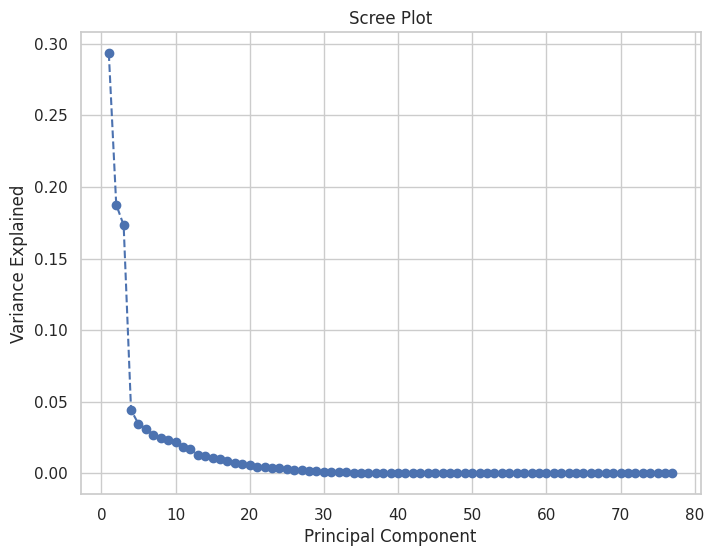

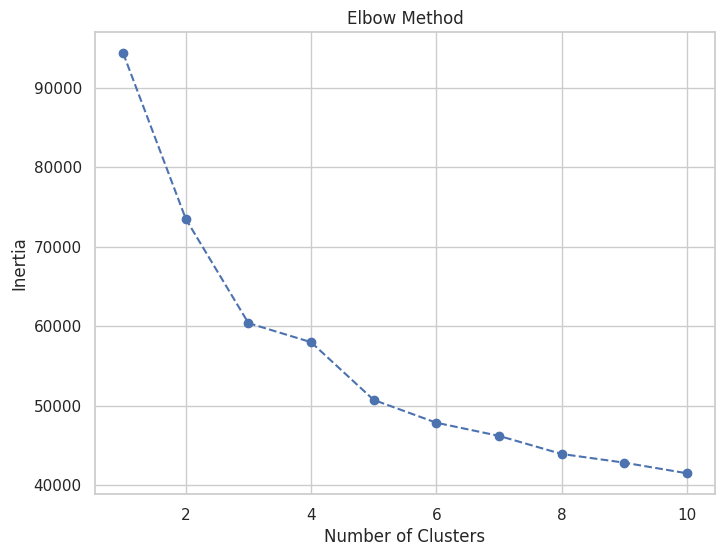

Top 20 Features Based on PCA Importance:
opponent_orb    6.280422
fg%             6.074380
tov%            6.068741
efg%            5.922492
drtg            5.903142
tov             5.900072
opponent_ft     5.874619
opponent_3p     5.850546
ft              5.838832
fta             5.832588
ortg            5.772852
opponent_fg%    5.754368
fga             5.751630
opponent_fga    5.743911
trb             5.743135
3par            5.736563
tov%_1          5.669654
orb             5.665499
3p              5.633395
drb%            5.579733
dtype: float64


In [14]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


# Only numeric columns
numeric_data = nba.select_dtypes(include=['float64', 'int64']).dropna()

# Standardize
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)

# PCA for dimensionality reduction and feature importance
pca = PCA()
pca_data = pca.fit_transform(scaled_data)

# Variance ratio for the scree plot
explained_variance = pca.explained_variance_ratio_

# Scree Plot
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

# Optimal number of clusters using the Elbow Method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Elbow Plot
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

# Feature importance based on PCA components
feature_importance = pd.DataFrame(
    pca.components_, 
    columns=numeric_data.columns
).abs().sum(axis=0).sort_values(ascending=False)

# List the top 15-20 features
top_features = feature_importance.head(20)
print("Top 20 Features Based on PCA Importance:")
print(top_features)

# New dataset including only the top 20 features
top_features_list = top_features.index.tolist()
new_dataset = nba[top_features_list]

new_dataset.to_csv("top_20_features_dataset.csv", index=False)
#print("New dataset with top 20 features saved as 'top_20_features_dataset.csv'")


K-means is employed here for clustering the dataset. 
Reflect on the need to group our data into clusters and whether this aligns with our analysis goals.

PCA is being used for dimensionality reduction and feature importance extraction. 
Consider if reducing the dataset dimensions is essential for our analysis.

The scree plot helps identify the most significant principal components. 
Ensure this aligns with our goal of reducing dimensions effectively.

The elbow method determines the optimal number of clusters for K-means. 
Confirm whether clustering is necessary for our dataset's objectives.

## Initial Modeling

### We will start with a linear regression on all of our variables

In [ ]:
#Removing the team column to only have numeric variables
numeric_columns = nba.select_dtypes(include=['float64', 'int64'])

      mp    fg   fga    fg%   3p  3pa    3p%    2p   2pa    2p%    ft   fta  \
0  240.9  47.0  94.4  0.498  0.6  2.5  0.252  46.4  91.9  0.505  24.7  30.8   
1  242.4  47.5  89.9  0.529  0.2  1.2  0.200  47.3  88.6  0.534  19.8  25.5   
2  243.0  46.5  98.1  0.474  0.4  2.3  0.193  46.0  95.8  0.481  20.8  26.9   
3  241.2  46.4  93.6  0.496  0.5  2.3  0.220  45.9  91.2  0.503  20.7  27.7   
4  242.4  44.1  90.1  0.490  2.0  5.1  0.384  42.1  84.9  0.496  23.3  29.9   

     ft%   orb   drb   trb   ast   stl  blk   tov    pf    pts  year  \
0  0.801  14.1  30.7  44.7  28.4   9.4  4.1  19.4  25.6  119.4  1980   
1  0.775  13.2  32.4  45.6  29.4   9.4  6.7  20.0  21.8  115.1  1980   
2  0.772  15.9  29.0  45.0  25.7   9.3  4.2  16.7  23.6  114.1  1980   
3  0.747  15.1  28.1  43.2  27.6  10.7  5.6  19.7  26.4  114.0  1980   
4  0.779  15.0  30.0  44.9  26.8   9.9  3.8  18.8  24.1  113.5  1980   

   opponent_mp  opponent_fg  opponent_fga  opponent_fg%  opponent_3p  \
0        240.9      

In [44]:
from sklearn.model_selection import train_test_split

#Getting X and y for splitting
X = numeric_columns.drop(columns=['playoff'])  #Independent variables
y = numeric_columns['playoff']                 #Dependent variable

#Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [29]:
!pip install statsmodels

/home/codespace/.python/current/lib/python3.12/pty.py:95: DeprecationWarning: This process (pid=5997) is multi-threaded, use of forkpty() may lead to deadlocks in the child.
  pid, fd = os.forkpty()


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.7/10.7 MB 57.3 MB/s eta 0:00:00


In [48]:
import statsmodels.api as sm

#Adding constant
X_train_with_const = sm.add_constant(X_train)

#Linear regression
model = sm.OLS(y_train, X_train_with_const)
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                playoff   R-squared:                       0.671
Model:                            OLS   Adj. R-squared:                  0.648
Method:                 Least Squares   F-statistic:                     28.92
Date:                Tue, 05 Nov 2024   Prob (F-statistic):          1.12e-181
Time:                        03:01:50   Log-Likelihood:                -160.79
No. Observations:                1003   AIC:                             455.6
Df Residuals:                     936   BIC:                             784.6
Df Model:                          66                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -5.8155     25.435     -0.229   

We can see from our inital linear regression model that we see a strong Adjusted R^2 score of .648 meaning that about 65% of the variance in a team making the playoffs or not is captured in our model. However, with all of the variables here, we believe that we can limit these and achieve better scores.

We'll start by changing our model to a logistic regression to capture the binary target variable.

### Checking VIF Scores

In [47]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

#Calculating VIF for each feature
vif_data = pd.DataFrame()
vif_data['feature'] = X_train.columns
vif_data['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]

print(vif_data)

/home/codespace/.python/current/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


         feature           VIF
0             mp           inf
1             fg  1.542796e+06
2            fga  3.624621e+06
3            fg%  1.473199e+06
4             3p  4.139213e+04
5            3pa  1.712791e+05
6            3p%  2.688529e+02
7             2p  5.813069e+05
8            2pa  2.035545e+06
9            2p%  3.233571e+04
10            ft  1.841107e+05
11           fta  1.731260e+05
12           ft%  5.071989e+04
13           orb  8.359338e+04
14           drb  5.080275e+05
15           trb  9.378503e+05
16           ast  3.688718e+02
17           stl  4.190659e+02
18           blk  5.826033e+01
19           tov  4.606180e+04
20            pf  1.816420e+03
21           pts  8.155781e+06
22          year  7.536497e+05
23   opponent_mp           inf
24   opponent_fg  1.605256e+06
25  opponent_fga  3.961406e+06
26  opponent_fg%  7.934681e+05
27   opponent_3p  3.942813e+04
28  opponent_3pa  1.893404e+05
29  opponent_3p%  4.628929e+02
30   opponent_2p  5.143985e+05
31  oppo

We see a lot of very highly correlated variables according to our VIF scores which we will remove some variables eventually to fix this.